In [2]:
import torch
import pandas as pd

C:\Users\Song\anaconda3\envs\ez_chem\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
tox21_raw = pd.read_csv("data/raw/tox21.csv")
tox21_raw

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


array([[<AxesSubplot:title={'center':'NR-AR'}>,
        <AxesSubplot:title={'center':'NR-AR-LBD'}>,
        <AxesSubplot:title={'center':'NR-AhR'}>],
       [<AxesSubplot:title={'center':'NR-Aromatase'}>,
        <AxesSubplot:title={'center':'NR-ER'}>,
        <AxesSubplot:title={'center':'NR-ER-LBD'}>],
       [<AxesSubplot:title={'center':'NR-PPAR-gamma'}>,
        <AxesSubplot:title={'center':'SR-ARE'}>,
        <AxesSubplot:title={'center':'SR-ATAD5'}>],
       [<AxesSubplot:title={'center':'SR-HSE'}>,
        <AxesSubplot:title={'center':'SR-MMP'}>,
        <AxesSubplot:title={'center':'SR-p53'}>]], dtype=object)

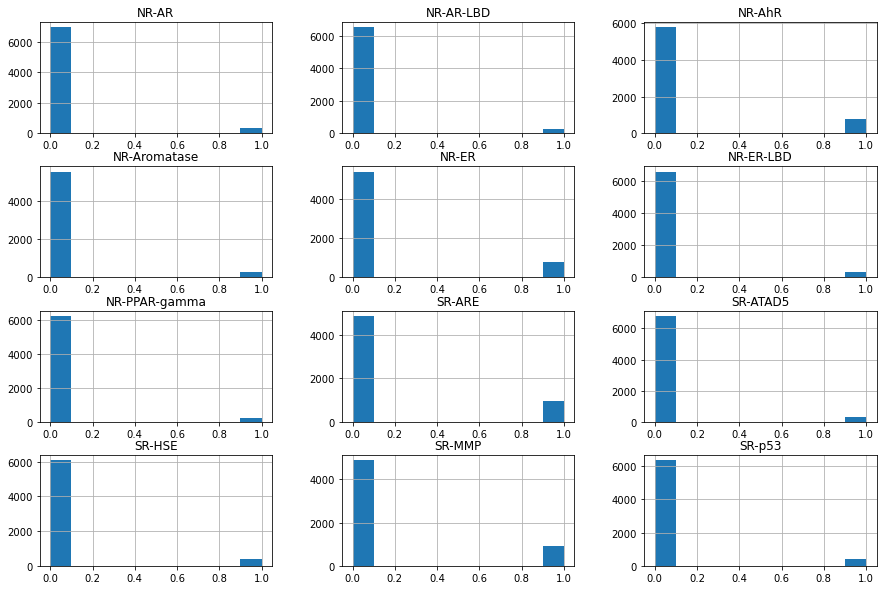

In [4]:
tox21_raw.hist(figsize=(15, 10))

In [5]:
tox21_sr_are = tox21_raw[["SR-ARE", "mol_id", "smiles"]]
print("Number of datapoints before drop NaNs: ", tox21_sr_are.shape[0])
tox21_sr_are_processed = tox21_sr_are.dropna()
print("Number of datapoints before drop NaNs: ", tox21_sr_are_processed.shape[0])

Number of datapoints before drop NaNs:  7831
Number of datapoints before drop NaNs:  5832


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
import os
import os.path as osp

split_file = "data/processed/tox21_split.pth"
# Here we save previously generated split into a pth file, so we will use the same split between different runs
if not osp.exists(split_file):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
    train_index, test_index = next(split.split(tox21_sr_are_processed["smiles"], tox21_sr_are_processed["SR-ARE"]))
    torch.save({"train_index": train_index, "test_index": test_index}, split_file)
else:
    split = torch.load(split_file)
    train_index = split["train_index"]
    test_index = split["test_index"]